# DAV 6150 Module 3 Assignment- Tidy data


Zhihong Zhang

## Introduction## 

 As the second module of the class, this assignment requires the application of many of the data preparation concepts covered in the required readings for Module 3. Specifically, I will be exploring and “cleaning” a data set that suffers from a variety of data integrity + usability issues. The data set is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines.   

## Data to be Used ##
The initial data set that was used for this assignment comes from the  Canvas. The data set is a csv format file which can be easily loaded into Python by utilizing the pandas package.  The data contains 12000 different of wine

 was set to work with full load., and it is used to generate the observable pattern and visualizations. 


## Part 1 Data Acquisition: ##

In [10]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

#reads data from the original source, since first row is column name,also add header. 
wine = pd.read_csv("https://raw.githubusercontent.com/steinszzh/DAV6150/master/m3hw/M3_Data.csv")

# data set check - make sure data was read in as expected
wine.head() 

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


### Data preparation: ###

Before we start data analysis, I will give summaries and explainations of these attributes.
The whole dataset now contains 12000 rows and 16 attributes. Due to the complexity of this data set, by reading the paper, these attributes are as follows:

- INDEX: 
Unique ID
- TARGET: 
Response Variable (indicates # of cases of wine sold)
- STARS: Wine rating as determined by experts (4 = excellent; 1 = Poor)

- LabelAppeal: Subjective marketing score that indicates the appeal of the design of the label on the bottle

- AcidIndex：
Measures total acidity of wine via a weighted average

- fixed acidity	: amount of fixed acid
-	volatile acidity: amount of volatile acid
- citric acid : amount of citric acid
- alcohol	: amount of alcohol
- residual sugar: amount of residual sugar
- chlorides : amount of chlorides
- free sulfur dioxide: amount of SO2 that is not bound to other molecules.
- total sulfur dioxide:  amount of total sulfur dioxide
- density: amount of whether the post is clicked or not.

- pH: The number of level of acidity

- sulphates	: amount of sulphates
- quality: quality of the red wine. 

The initial data set that was used for this research comes from the Canvas. The data set is a csv format file which can be easily loaded into Python by utilizing the pandas package. This data set addresses some wine information, and certain attributes are used to generate the observable pattern and visualizations. 



The first thing to do is to check the null value and if there exist null value

In [32]:
# how many observations are contained within the example data set?
wine.shape

(12795, 16)

It shows it should have 16 attributes among these 16 attributes.
Based on this function, we knew there supposed to be 12795 counts if there is no null value. Then we run desctibe function

In [11]:
#check data
wine.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


Based on my domain knowledge of these attributes, many of attributes seem to have measure error. Since the amount should not be negative for many terms which includes FixedAcidity	VolatileAcidity	CitricAcid,	ResidualSugar,	Chlorides,	FreeSulfurDioxide,	TotalSulfurDioxide,		Sulphates,	Alcohol	and LabelAppeal. These negative data should be dealt in Data Preparation. 	 


According to Stats describe function, we know there are missing value in these attributes. Chloride,  FreeSulfurDioxide	, TotalSulfurDioxide	, pH,	Sulphates,	Alcohol	, and STARS all have some missing values. Among these attributes, STARS has more than 20% data  missing. Other data have up to 10% missing data. 

In [13]:
#check whether there is none value
wine['STARS'].isnull().sum()

3359

In [14]:
# similarly, check other columns
#run only second largest missing data attributes- Sulphate
##wine['Chloride'].isnull().sum()
#wine['TotalSulfurDioxide'].isnull().sum()
#wine['Alcohol'].isnull().sum()
#wine['pH'].isnull().sum()
wine['Sulphates'].isnull().sum()

1210

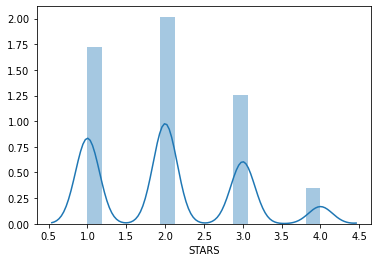

In [15]:
# create a graphic showing the distribution of the non-null 
# values
sns.distplot(wine[wine["STARS"].notnull()].STARS);

based on these results, there is some null values, for more detail analysis, we then need to analyse in the later section.




Based on this graph, we knew that rating of 2.0 contributes to the most amount of non-missing data wine. 

Since original name for column is good enough, and we then launch EDA.

## Part 2 Exporatory data analysis (EDA): ##

Firstly I start with general statistics of data set. Since the sdescribe function has provided general data already, we still need to check the data type. 

In [17]:
#start with checking data type
wine.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

Since the data type are all interger or float, and there is no need to worry on string recognization issue. 

Firstly, I need to plot to see the overview of all data set. 

To get a nice overview of other four attributes, plotting multi histogram is much efficient to go.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd513e920f0>,
      dtype=object)

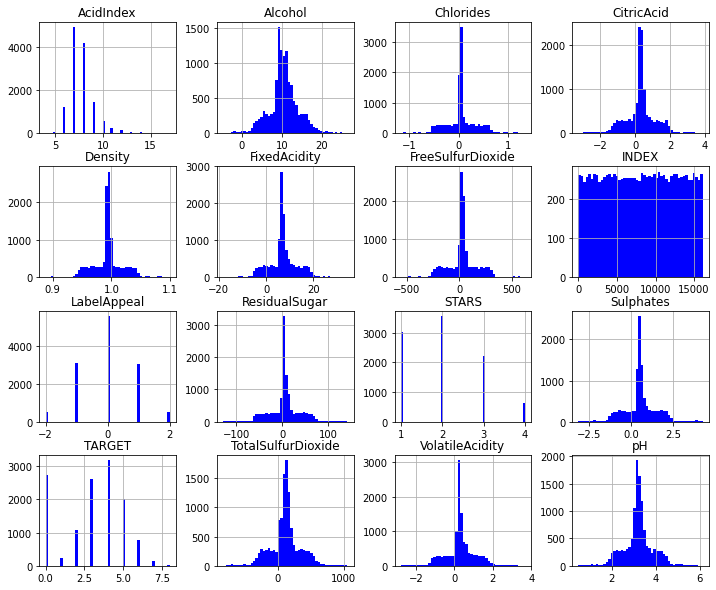

In [20]:
#run to have overview of all histogram
wine.hist(bins=50, color='b', figsize=(12,10))

Since we already know certain attributes have missing values. We need to mainly focus on Chloride, FreeSulfurDioxide , TotalSulfurDioxide , pH, Sulphates, Alcohol , and STARS. We can tell that Sulphates is mainly a uniform distribution and it does not provide much useful information. Even it has some missing data, we can even try not use this attributes.
All other six attributes have a quite normal shapes and we want to check carefully.  I used boxplot to detect the outlier

Text(0.5, 1.0, 'Box Plot of STARS')

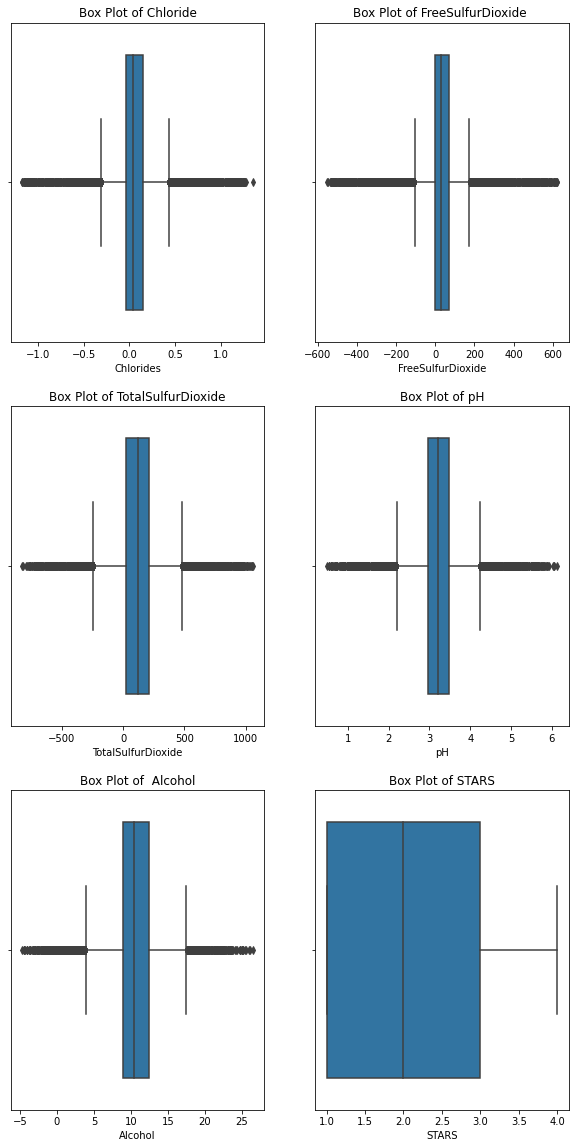

In [27]:
#For chect outlier, boxplot is used
 

plt.figure(figsize=(10,20))
# Boxplot of Chlorides
plt.subplot(321)
sns.boxplot(x=wine['Chlorides'])
plt.title('Box Plot of Chloride')

# Boxplot of FreeSulfurDioxide
plt.subplot(322)
sns.boxplot(x=wine['FreeSulfurDioxide'])
plt.title('Box Plot of FreeSulfurDioxide ')

# Boxplot of TotalSulfurDioxide
plt.subplot(323)
sns.boxplot(x=wine['TotalSulfurDioxide'])
plt.title('Box Plot of TotalSulfurDioxide')

# Boxplot of pH 
plt.subplot(324)
sns.boxplot(x=wine['pH'])
plt.title('Box Plot of pH')

# Boxplot of  Alcohol
plt.subplot(325)
sns.boxplot(x=wine['Alcohol'])
plt.title('Box Plot of  Alcohol')

plt.subplot(326)
sns.boxplot(x=wine['STARS'])
plt.title('Box Plot of STARS')


Text(0.5, 1.0, 'Box Plot of Sulphates')

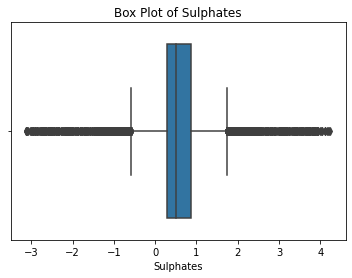

In [26]:

#plot sulfates
sns.boxplot(x=wine['Sulphates'])
plt.title('Box Plot of Sulphates')

Based on these boxplots, it is wasy to see many of them have many outliers. 

###apply heat map to checking correlation ###

For a safer check, I plan to use heat maps to see their coorelation values among variables
I use this method to check collinear

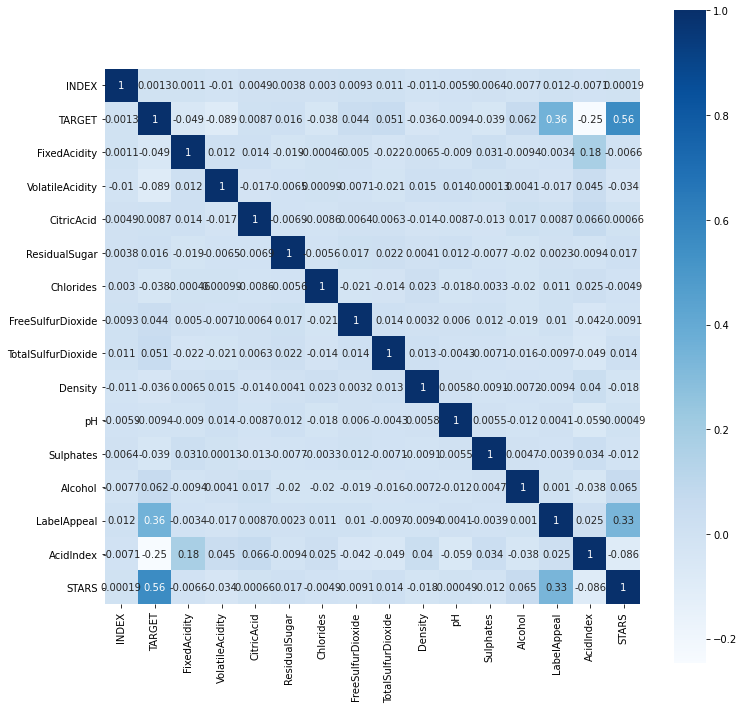

In [28]:
cor= wine.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(cor, annot=True, vmax=1, square=True, cmap="Blues")

For this heat map, as we knew index is just the unique ID, I can technically ignore all part related to this attributes. Read from whole maps, it is remarkable to see, TARGET and STARS have some stronger positive correlation. Also, there are some correlations among TARGET, LabelAppeal and STARS. There is some weak correlation between AcidIndex and Fixed Acidity. In general, Except these attributes, there is no evidence that there are some obvious coorelation among these data. 

## Part 3 Data Preparation : ##
Based on previous exploratory data analysis, then I need to clean some data in this section. The major issues to deal are as follows: missing values, improper neggative values and outliers. 
Firstly I would like to check this outliers first. 



Then check the setup

In [0]:
#prepare data for this section,use copy avoid mess up data
df= wine.copy()

In [0]:
#define outlier
#first get IQR
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1


In [30]:
#run to remove outlier. 
tidy = wine[~((wine < (Q1 - 1.5 * IQR)) |(wine > (Q3 + 1.5 * IQR))).any(axis=1)]
tidy.shape

(889, 16)

After clearing outlier, then we check these data, we knew there is a obvious problem here, clearing these outlier all together is not the right method for this data set. We can not clear more than 90% of whole data set. So I need to try other methods. I plan to do each individual outlier check. 

In [0]:
#
depdel_outliers = hf[np.abs(hf['DepDelay'] - hf['DepDelay'].mean() ) > (2.5 * hf['DepDelay'].std() )]
depdel_outliers.shape

As I mentioned earlier, the whole data set has issues with wrong negative values, and I need to clear this first. 

### negative data dealing

For these negative data in the attributes, I can either use absolute function to take out negatives or just take out whole data. Based on my domain knowledge, and it is safe to use absolute to deal with data set. 

In [33]:
#check again with data set
wine.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


FixedAcidity,VolatileAcidity,CitricAcid, Chlorides, 
          FreeSulfurDioxide,TotalSulfurDioxide,ResidualSugar,Sulphates,Alcohol and LabelAppeal all have issues with improper negative data	

In [37]:
#Try absolute value

#identify the attributes with negaive value. 
non_neg_data =df.abs()
non_neg_data.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,0.638687,7.772724,2.041755
std,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.621425,1.323926,0.902540
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,0.000000,7.000000,1.000000
50%,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,1.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


Now we have all positive values. 

### missing value

I try to use mean value to replace missing data. 

In [0]:
# NOTE: the 'factorplot()' function has been renamed to "catplot()"

sns.catplot(x='UniqueCarrier', y='DepDelay', col='Origin',
               kind='bar', data= depdel_outliers);

In [0]:
#

### Box Cox transformation

I may need to change certain numeric data into categorical data. SUch as deciding the range of certain PH level into weak acidity, neutral and strong. 

## Part 4  Prepped Data Review 

I rerun the EDA

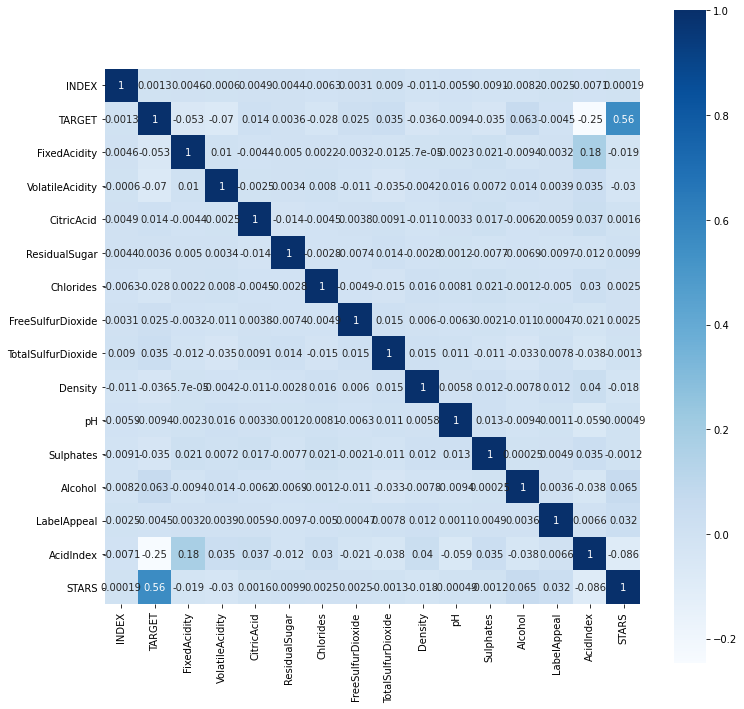

In [38]:
#check again with correlation
cor2=  non_neg_data.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(cor2, annot=True, vmax=1, square=True, cmap="Blues")

Now we can tell that 

Based on that, we can then build logistical regression model to predict wine quality. This part of analysis is similar to my previous wine data project in github repository: https://github.com/steinszzh/DAV5300/blob/master/Midterm/zh_zhang_MidtermProject.ipynb

Check it for more technical part on logistical regression.

## Part 5 Conclusion: ##

Based on this analysis and cleaning data process, I can say that for this cleaned dataset is safe for further machine learning model built. 